In [1]:
import numpy as np
import collections
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [258]:
def create_dataset():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = np.array(['A', 'A', 'B', 'B'])
    return group, labels

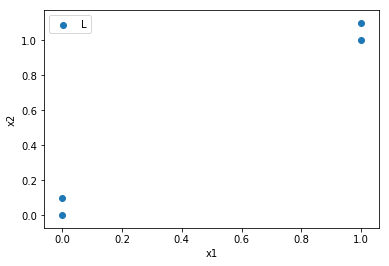

In [259]:
group, labels = create_dataset()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(group[:, 0], group[:, 1], label = 'L')
ax.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [25]:
class knn:
    '''
    knn algorithm
    dataset: a numpy array with shape [num_of_example, num_of_feature]
    labels: a numpy array with shape [num_of_example, ]
    k: k example of most neary
    x: data to classify with share [num_of_data, num_of_feature]
    '''
    def __init__(self, dataset, labels, k, auto_norm=False):
        assert dataset.shape[0] == labels.shape[0]
        self.x = None
        
        self.auto_norm = auto_norm
        if auto_norm == True:
            self.norm_min = dataset.min(0)
            self.norm_max = dataset.max(0)
            self.norm_ranges = self.norm_max - self.norm_min
            self.dataset = (dataset - self.norm_min)/self.norm_ranges
        else:
            self.dataset = dataset
        
        self.labels = labels
        self.k = k
        self.class_list = None
        
    def set_input(self, x):
        assert x.shape[1] == self.dataset.shape[1]
        if self.auto_norm == True:
            self.x = (x - self.norm_min)/self.norm_ranges
        else:
            self.x = x
        
    def set_k(self, k):
        self.k = k
        
    def run(self):
        assert self.x is not None
        # calcuate the distance for every input and example
        # !!Be careful that it wounld need a lager memory even cause Mem_error
        # !!when shape of x and dataset is both larger in this below method
        dis_mat = (((self.x[:, None] - self.dataset)**2).sum(axis=2))**0.5
        k_sort = dis_mat.argsort()[:, :self.k] # sort the distance and get the k nearest example's index
        label_mat = self.labels[k_sort] #map the example's index to the label
        self.class_list = list()
        for i in range(self.x.shape[0]):
            self.class_list.append(collections.Counter(label_mat[i]).most_common(1)[0][0])
        self.class_list = np.array(self.class_list)
        return self.class_list
    
    def plot_2d(self, figsize = plt.rcParams['figure.figsize']):
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111)
        for label in set(self.labels):
            ax.scatter(self.dataset[self.labels == label, 0], \
                       self.dataset[self.labels == label, 1], label = label)
            if self.x is not None and self.class_list is not None:
                ax.scatter(self.x[self.class_list == label, 0], \
                           self.x[self.class_list == label, 1], marker='x',s=100, label = label)
            
        ax.legend()
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.show()
    
    def plot_3d(self, figsize = plt.rcParams['figure.figsize']):
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection='3d')
        for label in set(self.labels):
            ax.scatter(self.dataset[self.labels == label, 0], \
                       self.dataset[self.labels == label, 1], \
                       self.dataset[self.labels == label, 2], label = label)
            if self.x is not None and self.class_list is not None:
                ax.scatter(self.x[self.class_list == label, 0], \
                           self.x[self.class_list == label, 1], \
                           self.x[self.class_list == label, 2], marker='x',s=200, label = label)
        ax.legend()
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.show()

In [707]:
a = np.array([[0.5,0],[1,2]])
group, labels = create_dataset()

In [708]:
a

array([[ 0.5,  0. ],
       [ 1. ,  2. ]])

In [709]:
my_knn = knn(group, labels, 2)
my_knn.set_input(a)
my_knn.run()

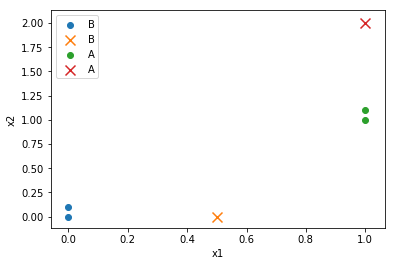

In [712]:
my_knn.plot_2d()

In [713]:
def load_test_data(filename):
    fr = open(filename)
    lines = fr.readlines()
    m = len(lines)
    n = len(lines[0].strip().split('\t')) - 1
    dataset = np.zeros([m, n])
    labels = list()
    index = 0
    for line in lines:
        line = line.strip().split('\t')
        dataset[index] = [float(i) for i in line[:n]]
        labels.append(line[n])
        index = index + 1
    return dataset, np.array(labels)

In [714]:
dataset, labels = load_test_data('datingTestSet.txt')

In [715]:
knn_test = knn(dataset, labels, 5)

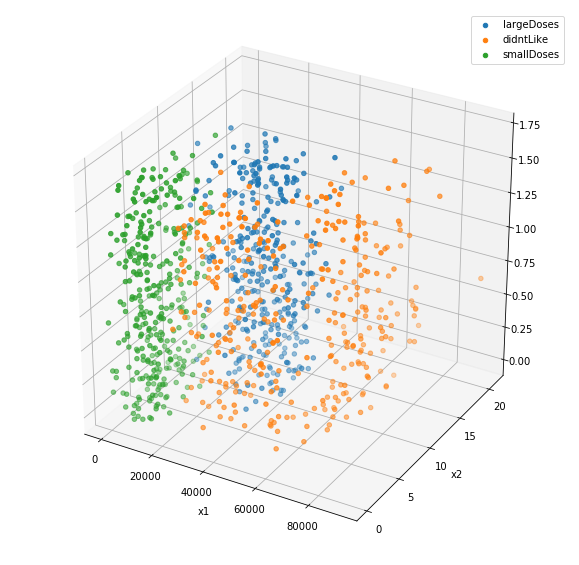

In [716]:
knn_test.plot_3d([10, 10])

In [717]:
dataset[:10]

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       [  7.51360000e+04,   1.31473940e+01,   4.28964000e-01],
       [  3.83440000e+04,   1.66978800e+00,   1.34296000e-01],
       [  7.29930000e+04,   1.01417400e+01,   1.03295500e+00],
       [  3.59480000e+04,   6.83079200e+00,   1.21319200e+00],
       [  4.26660000e+04,   1.32763690e+01,   5.43880000e-01],
       [  6.74970000e+04,   8.63157700e+00,   7.49278000e-01],
       [  3.54830000e+04,   1.22731690e+01,   1.50805300e+00]])

In [718]:
test = np.array([[100,14,1]])
knn_test.set_input(test)
knn_test.run()

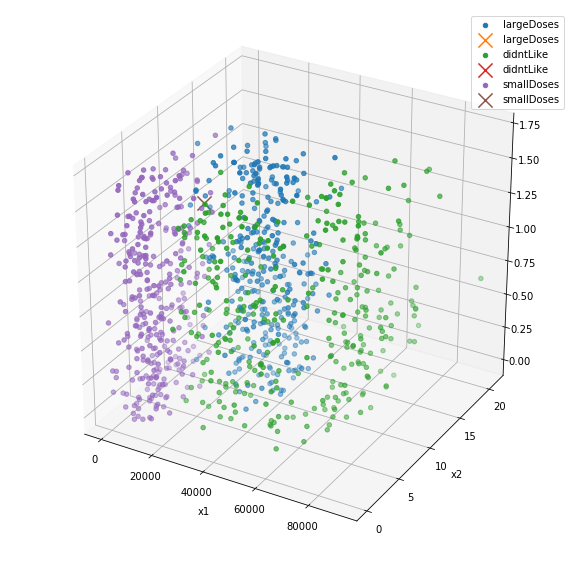

In [721]:
knn_test.plot_3d(figsize=[10,10])

In [722]:
knn_test = knn(dataset, labels, 5, auto_norm=True)
knn_test.set_input(test)
knn_test.run()

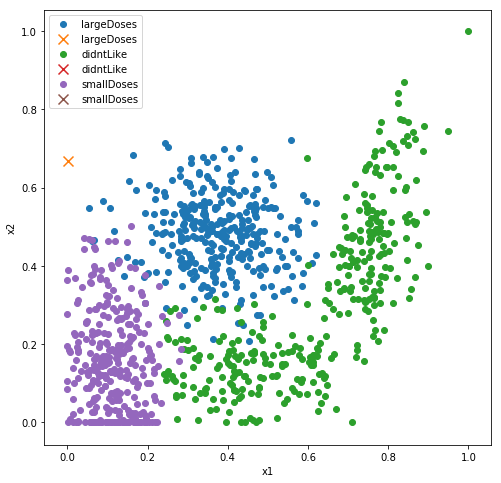

In [729]:
knn_test.plot_2d(figsize=[8, 8])

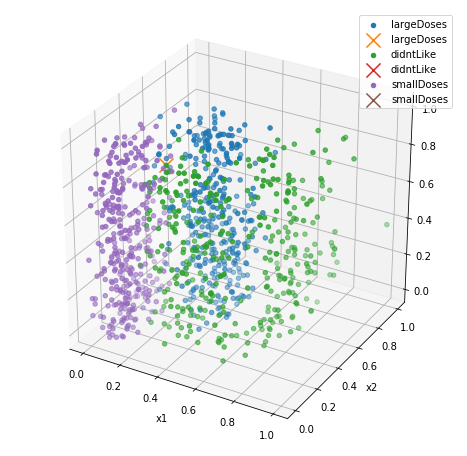

In [728]:
knn_test.plot_3d(figsize=[8,8])

In [758]:
knn_test.set_k(5)
knn_test.run()

array(['largeDoses', 'smallDoses', 'didntLike', 'didntLike', 'didntLike',
       'didntLike', 'largeDoses', 'largeDoses', 'didntLike', 'largeDoses',
       'didntLike', 'didntLike', 'smallDoses', 'didntLike', 'didntLike',
       'didntLike', 'didntLike', 'didntLike', 'smallDoses', 'largeDoses',
       'smallDoses', 'didntLike', 'smallDoses', 'largeDoses', 'smallDoses',
       'largeDoses', 'smallDoses', 'largeDoses', 'smallDoses', 'didntLike',
       'largeDoses', 'didntLike', 'largeDoses', 'didntLike', 'smallDoses',
       'didntLike', 'didntLike', 'smallDoses', 'largeDoses', 'largeDoses',
       'didntLike', 'smallDoses', 'largeDoses', 'largeDoses', 'largeDoses',
       'didntLike', 'didntLike', 'didntLike', 'didntLike', 'smallDoses',
       'smallDoses', 'didntLike', 'largeDoses', 'smallDoses', 'smallDoses',
       'smallDoses', 'smallDoses', 'largeDoses', 'didntLike', 'smallDoses',
       'didntLike', 'smallDoses', 'smallDoses', 'smallDoses', 'smallDoses',
       'smallDoses', 'lar

In [736]:
knn_test.set_input(dataset)

In [737]:
knn_test.run()

array(['largeDoses', 'smallDoses', 'didntLike', 'didntLike', 'didntLike',
       'didntLike', 'largeDoses', 'largeDoses', 'didntLike', 'largeDoses',
       'didntLike', 'didntLike', 'smallDoses', 'didntLike', 'didntLike',
       'didntLike', 'didntLike', 'didntLike', 'smallDoses', 'largeDoses',
       'smallDoses', 'didntLike', 'smallDoses', 'largeDoses', 'smallDoses',
       'largeDoses', 'smallDoses', 'largeDoses', 'smallDoses', 'didntLike',
       'largeDoses', 'didntLike', 'smallDoses', 'didntLike', 'smallDoses',
       'didntLike', 'didntLike', 'smallDoses', 'largeDoses', 'largeDoses',
       'didntLike', 'smallDoses', 'largeDoses', 'largeDoses', 'largeDoses',
       'didntLike', 'didntLike', 'didntLike', 'didntLike', 'smallDoses',
       'smallDoses', 'didntLike', 'largeDoses', 'smallDoses', 'smallDoses',
       'smallDoses', 'smallDoses', 'largeDoses', 'didntLike', 'smallDoses',
       'didntLike', 'smallDoses', 'smallDoses', 'smallDoses', 'smallDoses',
       'smallDoses', 'lar

In [760]:
((knn_test.class_list == knn_test.labels) * 1).sum()/knn_test.dataset.shape[0]

0.96399999999999997

## Use knn to resolve handwriting problem

In [4]:
import os
import pickle

In [12]:
train_dir = './trainingDigits'
test_dir = './testDigits/'
train_file_list = os.listdir(train_dir)
test_file_list = os.listdir(test_dir)

In [13]:
train_file_list 

['3_45.txt',
 '5_111.txt',
 '7_130.txt',
 '3_6.txt',
 '9_21.txt',
 '8_49.txt',
 '8_0.txt',
 '9_102.txt',
 '3_36.txt',
 '7_53.txt',
 '8_115.txt',
 '7_45.txt',
 '6_83.txt',
 '4_32.txt',
 '6_93.txt',
 '5_62.txt',
 '4_96.txt',
 '0_18.txt',
 '2_170.txt',
 '3_124.txt',
 '1_179.txt',
 '7_4.txt',
 '8_27.txt',
 '9_0.txt',
 '7_193.txt',
 '2_4.txt',
 '2_97.txt',
 '1_42.txt',
 '4_31.txt',
 '8_25.txt',
 '3_26.txt',
 '8_1.txt',
 '7_115.txt',
 '4_159.txt',
 '5_131.txt',
 '5_28.txt',
 '2_74.txt',
 '0_101.txt',
 '2_90.txt',
 '3_21.txt',
 '6_3.txt',
 '1_20.txt',
 '1_166.txt',
 '5_59.txt',
 '2_108.txt',
 '2_99.txt',
 '4_94.txt',
 '2_75.txt',
 '4_97.txt',
 '7_10.txt',
 '5_150.txt',
 '8_84.txt',
 '7_15.txt',
 '7_131.txt',
 '1_120.txt',
 '1_176.txt',
 '0_39.txt',
 '7_121.txt',
 '9_171.txt',
 '2_12.txt',
 '6_10.txt',
 '4_116.txt',
 '8_156.txt',
 '2_14.txt',
 '3_32.txt',
 '1_190.txt',
 '1_71.txt',
 '1_41.txt',
 '4_23.txt',
 '6_21.txt',
 '6_88.txt',
 '9_123.txt',
 '0_129.txt',
 '2_162.txt',
 '7_154.txt',
 '7_1

In [14]:
len(train_file_list)

1934

In [16]:
len(test_file_list)

946

In [790]:
fr = open(train_dir+'/'+train_file_list[0])
lines = fr.readlines()
n = len(lines)

In [791]:
n

32

In [803]:
handwriting_data = np.zeros([len(train_file_list),n*n])
for i in range(n):
    for j in range (n):
        handwriting_data[0][i*n+j] = int(lines[i][j])

In [804]:
handwriting_data

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [806]:
handwriting_data[0].sum()

318.0

In [808]:
int(train_file_list[0].split('_')[0])

3

In [75]:
train_dir = './trainingDigits'
test_dir = './testDigits/'

def load_handwriting_data(train_dir, test_dir):
    train_file_list = os.listdir(train_dir)
    test_file_list = os.listdir(test_dir)
    train_datas = np.zeros([len(train_file_list),1024], dtype='int')
    train_labels = np.zeros(len(train_file_list), dtype='int')
    test_datas = np.zeros([len(test_file_list),1024], dtype='int')
    test_labels = np.zeros(len(test_file_list), dtype='int')
    
    for file_index in range(len(train_file_list)):
        fr = open(train_dir+'/'+train_file_list[file_index])
        lines = fr.readlines()
        for i in range(32):
            for j in range (32):
                train_datas[file_index][i*32+j] = int(lines[i][j])
        train_labels[file_index] = int(train_file_list[file_index].split('_')[0])
        
    for file_index in range(len(test_file_list)):
        fr = open(test_dir+'/'+test_file_list[file_index])
        lines = fr.readlines()
        for i in range(32):
            for j in range (32):
                test_datas[file_index][i*32+j] = int(lines[i][j])
        test_labels[file_index] = int(test_file_list[file_index].split('_')[0])
    return train_datas, train_labels, test_datas, test_labels

train_datas, train_labels, test_datas, test_labels = load_handwriting_data(train_dir, test_dir)

In [76]:
handwriting_knn = knn(train_datas, train_labels, 10)

In [77]:
handwriting_knn.set_input(np.array([test_datas[1]]))

In [78]:
handwriting_knn.run()

array([3])

In [96]:
handwriting_knn.set_k(5)

In [97]:
test_predict = list()
for i in range(len(test_datas)):
    handwriting_knn.set_input(np.array([test_datas[i]]))
    test_predict.append(handwriting_knn.run()[0])

In [105]:
(test_predict == test_labels).sum()/len(test_labels) ## accuate rate

0.98731501057082449

In [118]:
best_k = -1
best_acc = -1
for k in range(1,11):
    handwriting_knn.set_k(k)
    test_predict = list()
    for i in range(len(test_datas)):
        handwriting_knn.set_input(np.array([test_datas[i]]))
        test_predict.append(handwriting_knn.run()[0])
    acc_rate = float((test_predict == test_labels).sum())/len(test_labels) 
    print('k:', k, ' ', 'acc_rate:', acc_rate)
    if acc_rate > best_acc:
        best_k = k
        best_acc = acc_rate
print('test best k is', best_k, 'its acc_rate is', best_acc)

k: 1   acc_rate: 0.9873150105708245
k: 2   acc_rate: 0.9873150105708245
k: 3   acc_rate: 0.9894291754756871
k: 4   acc_rate: 0.9883720930232558
k: 5   acc_rate: 0.9820295983086681
k: 6   acc_rate: 0.9820295983086681
k: 7   acc_rate: 0.9778012684989429
k: 8   acc_rate: 0.9799154334038055
k: 9   acc_rate: 0.9788583509513742
k: 10   acc_rate: 0.9799154334038055
test best k is 3 its acc_rate is 0.9894291754756871
